Section1：再帰型ニューラルネットワークの概念

iters:0
Loss:1.2580713295358779
A [0 1 1 1 1 1 1 0]  B [0 0 1 1 0 0 1 1]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 0 0 0 1]
126 + 51 = 0
------------
iters:100
Loss:1.0505807801713463
A [0 0 0 0 1 1 0 0]  B [0 0 0 1 1 0 0 0]
Pred:[1 0 0 0 0 0 1 1]
True:[0 0 1 0 0 1 0 0]
12 + 24 = 131
------------
iters:200
Loss:0.9578975707702252
A [0 0 0 1 1 0 1 0]  B [0 0 1 0 1 0 1 1]
Pred:[1 0 1 0 0 1 0 1]
True:[0 1 0 0 0 1 0 1]
26 + 43 = 165
------------
iters:300
Loss:1.0658614307139593
A [0 0 0 0 1 1 1 1]  B [0 1 0 1 1 1 0 1]
Pred:[1 1 1 1 1 1 1 0]
True:[0 1 1 0 1 1 0 0]
15 + 93 = 254
------------
iters:400
Loss:1.0469750452805124
A [0 1 0 0 1 0 0 0]  B [0 0 0 0 1 0 0 0]
Pred:[1 1 1 1 1 0 1 0]
True:[0 1 0 1 0 0 0 0]
72 + 8 = 250
------------
iters:500
Loss:0.9265058781920513
A [0 1 1 0 0 1 1 1]  B [0 0 0 1 0 1 1 1]
Pred:[1 1 1 1 1 1 1 0]
True:[0 1 1 1 1 1 1 0]
103 + 23 = 254
------------
iters:600
Loss:1.381032177548102
A [0 1 1 1 1 1 0 1]  B [0 1 1 1 0 1 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 1 1 0 0 

iters:5700
Loss:0.009537292088069966
A [0 1 0 0 0 0 0 1]  B [0 0 1 1 1 0 1 0]
Pred:[0 1 1 1 1 0 1 1]
True:[0 1 1 1 1 0 1 1]
65 + 58 = 123
------------
iters:5800
Loss:0.004675961977043778
A [0 0 1 0 0 0 1 1]  B [0 1 0 0 1 0 1 0]
Pred:[0 1 1 0 1 1 0 1]
True:[0 1 1 0 1 1 0 1]
35 + 74 = 109
------------
iters:5900
Loss:0.006605941038279534
A [0 1 1 0 0 1 1 1]  B [0 0 1 0 1 0 0 1]
Pred:[1 0 0 1 0 0 0 0]
True:[1 0 0 1 0 0 0 0]
103 + 41 = 144
------------
iters:6000
Loss:0.008410058654069354
A [0 1 0 1 1 0 0 0]  B [0 0 1 0 0 1 0 0]
Pred:[0 1 1 1 1 1 0 0]
True:[0 1 1 1 1 1 0 0]
88 + 36 = 124
------------
iters:6100
Loss:0.011386078009587262
A [0 0 0 0 0 0 1 0]  B [0 0 0 0 0 1 1 0]
Pred:[0 0 0 0 1 0 0 0]
True:[0 0 0 0 1 0 0 0]
2 + 6 = 8
------------
iters:6200
Loss:0.015863708082008064
A [0 0 0 1 1 1 0 1]  B [0 1 0 1 1 0 1 1]
Pred:[0 1 1 1 1 0 0 0]
True:[0 1 1 1 1 0 0 0]
29 + 91 = 120
------------
iters:6300
Loss:0.008671726287569664
A [0 0 0 0 1 1 1 1]  B [0 1 1 1 0 1 0 0]
Pred:[1 0 0 0 0 0 1

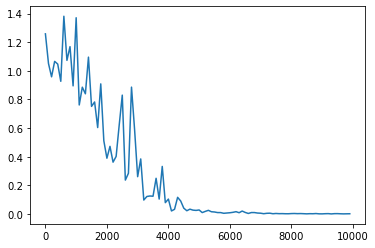

In [2]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * 
                            functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + 
                      np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("A", a_bin, " B", b_bin)
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")

ReLU(学習できない)

iters:0
Loss:18.905375353335053
A [0 1 0 0 1 0 0 1]  B [0 0 0 0 1 0 0 0]
Pred:[0 0 0 0 0 3 5 0]
True:[0 1 0 1 0 0 0 1]
73 + 8 = 22
------------
iters:100
Loss:2.5
A [0 0 0 0 0 1 0 0]  B [0 1 0 1 0 0 1 1]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 0 1 1 1]
4 + 83 = 0
------------
iters:200
Loss:2.0
A [0 0 1 0 0 1 1 0]  B [0 0 1 0 1 1 0 1]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 0 0 1 1]
38 + 45 = 0
------------
iters:300
Loss:2.0
A [0 1 0 0 0 1 0 0]  B [0 1 0 1 1 1 1 1]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 0 0 0 1 1]
68 + 95 = 0
------------
iters:400
Loss:3.0
A [0 1 1 1 1 0 1 1]  B [0 0 0 0 0 0 1 1]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 1 1 1 0]
123 + 3 = 0
------------
iters:500
Loss:3.0
A [0 0 0 0 0 1 0 1]  B [0 1 1 1 0 0 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 1 1 1]
5 + 114 = 0
------------
iters:600
Loss:2.5
A [0 0 1 0 1 0 1 1]  B [0 1 1 0 0 1 0 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 1 1 1 1]
43 + 100 = 0
------------
iters:700
Loss:2.5
A [0 0 1 1 0 1 1 0]  B [0 0 0 0 0 0 0 1]
Pred:[0 0 

iters:6200
Loss:3.0
A [0 1 0 1 0 1 1 0]  B [0 1 1 0 1 0 0 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 1 1 1 0]
86 + 104 = 0
------------
iters:6300
Loss:1.5
A [0 1 1 1 1 1 0 0]  B [0 0 1 0 0 1 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 0 0 0 1 0]
124 + 38 = 0
------------
iters:6400
Loss:1.5
A [0 1 0 1 0 0 1 0]  B [0 0 0 1 0 0 0 0]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 0 0 1 0]
82 + 16 = 0
------------
iters:6500
Loss:1.0
A [0 0 0 1 1 1 0 0]  B [0 1 1 0 0 1 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 0 1 0]
28 + 102 = 0
------------
iters:6600
Loss:2.5
A [0 1 1 0 0 0 1 1]  B [0 0 0 1 0 1 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 1 0 0 1]
99 + 22 = 0
------------
iters:6700
Loss:2.0
A [0 1 0 1 1 0 1 0]  B [0 1 1 1 1 0 1 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 1 0 1 0 0]
90 + 122 = 0
------------
iters:6800
Loss:2.0
A [0 1 1 0 0 0 1 0]  B [0 1 0 0 1 0 0 0]
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 0 1 0 1 0]
98 + 72 = 0
------------
iters:6900
Loss:1.0
A [0 0 1 0 1 1 0 0]  B [0 1 1 0 0 1 0 0]
Pred:[0 0 0

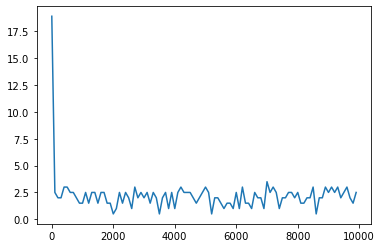

In [3]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.relu(u[:,t+1])

        y[:,t] = functions.relu(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_relu(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + 
                      np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("A", a_bin, " B", b_bin)
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")